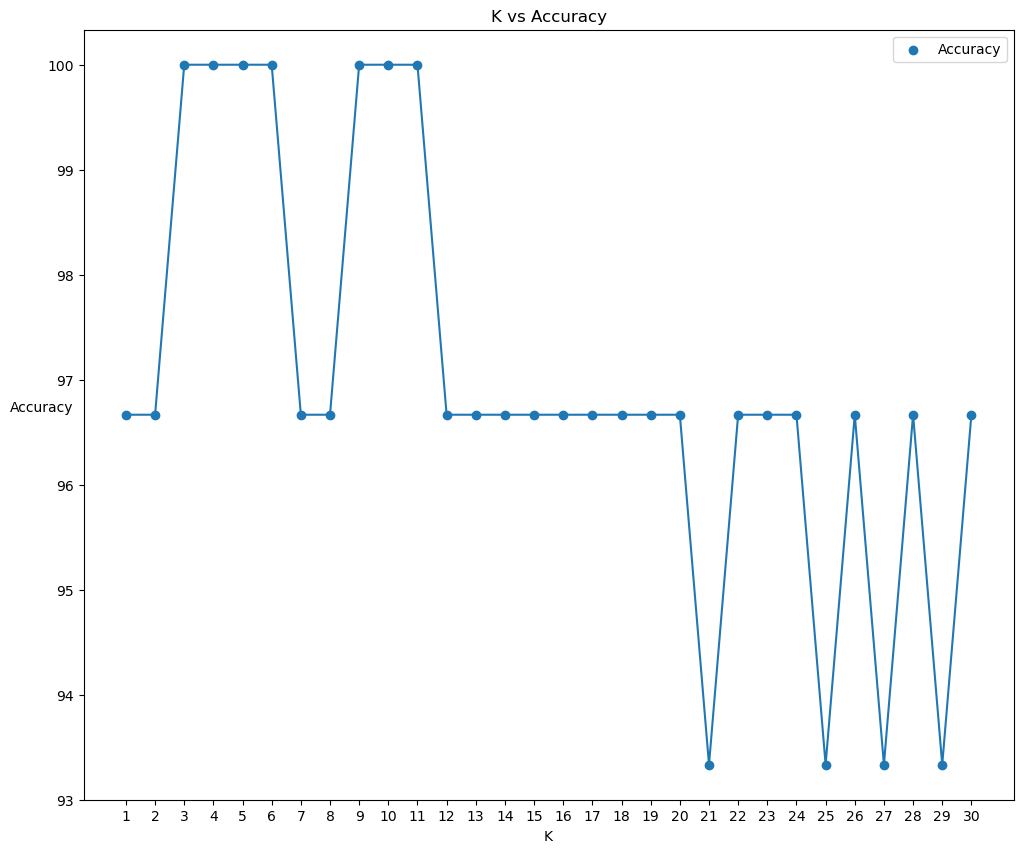

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import operator
def getDataset(loc):
    columns = ['sepal_length', 'sepal_width','petal_length','petal_width', 'class']
    data = pd.read_csv(loc, header=None, names=columns)
    return data
def splitDataset(dataset, ratio):
    split = StratifiedShuffleSplit(n_splits=1, test_size=ratio, random_state=42)
    
    for train_index, test_index in split.split(dataset, dataset['class']):
        train_data = dataset.loc[train_index]
        test_data = dataset.loc[test_index]
    
    
    return train_data, test_data
def euclideanDistance(instance1, instance2):
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    distance = np.sum(np.power(instance1 - instance2, 2))
    return np.sqrt(distance)
# using pandas indexing methods

def getKNeighbors(training_set, test_instance, k):
    distances = []
    classes = training_set['class'].unique()
    for row in range(len(training_set)):
        dist = euclideanDistance(training_set.iloc[row].values[:-1], test_instance[:-1])
        
        distances.append((training_set.iloc[row]['class'], dist))

    distances = sorted(distances, key=operator.itemgetter(1))[:k]
    inv_class_freq = {x:0 for x in classes}
    
    for cls, dist in distances:
        inv_class_freq[cls] += (1 / dist)

    return inv_class_freq
# faster cause turning the data into a list of lists
# as the dataset is smaller in size

def getKNeighbors(training_set, test_instance, k):
    distances = []
    classes = training_set['class'].unique()
    
    training_set = training_set.values
    
    for row in range(len(training_set)):
        dist = euclideanDistance(training_set[row][:-1], test_instance[:-1])
        
        distances.append((training_set[row][-1], dist))
    distances = sorted(distances, key=operator.itemgetter(1))[:k]
    inv_class_freq = {x:0 for x in classes}
    
    for cls, dist in distances:
        inv_class_freq[cls] += (1 / dist)

    return inv_class_freq
def getResponse(inv_freq):
    predicted_class = max(inv_freq, key=inv_freq.get)
    return predicted_class
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet.iloc[x]['class'] == predictions[x]:
            correct += 1
    return (correct/len(testSet)) * 100.0
if __name__ == '__main__':
    # get data
    data = getDataset(r'iris.data')
    
    # split data into stratified subsets
    ratio = 0.2
    trainingSet, testSet = splitDataset(data, ratio)

    trainingSet = trainingSet.reset_index(drop=True)
    testSet = testSet.reset_index(drop=True)
    accuracy_scores = []
    # generate predictions
    for k in range(1, 31):
        predictions = []
        for row in range(len(testSet)):
            inv_freq = getKNeighbors(trainingSet, testSet.iloc[row].values, k)
            result = getResponse(inv_freq)
            predictions.append(result)

        accuracy = getAccuracy(testSet, predictions)
        accuracy_scores.append(accuracy)
#         print(f'k: {k}, Accuracy: {round(accuracy,3)}%')
plt.figure(figsize=(12, 10))
plt.plot(list(range(1, 31)), accuracy_scores)
plt.scatter(list(range(1, 31)), accuracy_scores, label="Accuracy")
plt.title('K vs Accuracy')
plt.xticks(ticks=range(1, 31))
plt.xlabel('K')
plt.ylabel('Accuracy', rotation=0)
plt.legend()